In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mode
from matplotlib import pyplot as plt
from PIL import Image
import PIL

In [2]:
# import data
# data URL: https://catalog.data.gov/dataset/accidental-drug-related-deaths-2012-2018
# Public Access: This dataset is intended for public access and use
# Publisher: data.ct.gov
data = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2020.csv")
data.columns= data.columns.str.lower()
data.head()

,id,date,date type,age,sex,race,residence city,residence county,residence state,death city,...,morphine (not heroin),hydromorphone,xylazine,other,opiate nos,any opioid,manner of death,deathcitygeo,residencecitygeo,injurycitygeo
0,12-0187,7/17/2012,DateofDeath,34.0,Female,White,MAHOPAC,PUTNAM,NaN,DANBURY,...,NaN,NaN,NaN,Duster,NaN,NaN,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"CT\n(41.575155, -72.738288)"
1,12-0258,10/1/2012,DateofDeath,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\n(41.581345, -72.634112)","PORTLAND, CT\n(41.581345, -72.634112)","CT\n(41.575155, -72.738288)"
2,13-0146,4/28/2013,DateofDeath,28.0,Male,White,NaN,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
3,14-0150,4/6/2014,DateofDeath,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\n(41.812186, -73.101552)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)"
4,14-0183,4/27/2014,DateofDeath,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","CT\n(41.575155, -72.738288)"


In [3]:
# drop redundant variables
# set format of Date column to month, day, year, source: https://www.kite.com/python/answers/how-to-change-the-pandas-datetime-format-in-python#:~:text=Call%20dataframe%5Bcolumn%5D%20.,%25y%22%20for%20the%20year
data = data.drop(columns=['residence city', 'residence county', 'residence state', 'death city', 'death county', 'location', 'location if other', 'injury city', 'injury county', 'injury state', 'manner of death', 'deathcitygeo', 'residencecitygeo', 'injurycitygeo'])
data.head(15)

,id,date,date type,age,sex,race,description of injury,injury place,cause of death,heroin,...,benzodiazepine,methadone,amphet,tramad,morphine (not heroin),hydromorphone,xylazine,other,opiate nos,any opioid
0,12-0187,7/17/2012,DateofDeath,34.0,Female,White,Huffed Propellant,Other,"1,1-Difluoroethane Toxicity",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Duster,NaN,NaN
1,12-0258,10/1/2012,DateofDeath,51.0,Male,White,Injection,Residence,Heroin Toxicity,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13-0146,4/28/2013,DateofDeath,28.0,Male,White,Substance Abuse,Other,Acute Heroin Toxicity,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-0150,4/6/2014,DateofDeath,46.0,Male,White,Injection,Other,Heroin and Cocaine Intoxication,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14-0183,4/27/2014,DateofDeath,52.0,Male,White,Substance Abuse,Unknown,Acute Heroin Intoxication,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15-0023,1/12/2015,DateReported,50.0,Male,White,NaN,Residence,Acute Cocaine Toxicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15-0052,2/1/2015,DateReported,52.0,Male,White,NaN,Residence,Acute Heroin Toxicity,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
7,15-0239,5/21/2015,DateReported,32.0,Male,White,NaN,Other,"Heroin, ethanol, oxycod",Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
8,15-0249,5/26/2015,DateReported,38.0,Female,White,NaN,Unknown,Cocaine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15-0365,7/17/2015,DateReported,42.0,Male,White,NaN,Residence,Acute Heroin Toxicity,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y


In [22]:
# missing value analysis
# clean dataset - NaN values in type of drug columns are to be interpreted as 'N' for No and not missing
# only keep NaN if all entries in row for columns in type_of_drug is NaN
type_of_drug = data[["heroin", "cocaine", "fentanyl", "fentanyl analogue", "oxycodone", "oxymorphone", "ethanol", "hydrocodone",	"benzodiazepine", "methadone", "amphet", "tramad", "morphine (not heroin)", "hydromorphone", "xylazine", "other", "opiate nos",	"any opioid"]]
row = 0
col_num = len(type_of_drug.columns)

while row < len(type_of_drug):
    num_nan = type_of_drug.iloc[row].isna().sum()
    if num_nan != col_num: type_of_drug.iloc[row].fillna("N", inplace=True)
    row += 1
# type_of_drug.head()

In [23]:
# updating data with type_of_drug
data[["heroin", "cocaine", "fentanyl", "fentanyl analogue", "oxycodone", "oxymorphone", "ethanol", "hydrocodone",	"benzodiazepine", "methadone", "amphet", "tramad", "morphine (not heroin)", "hydromorphone", "xylazine", "other", "opiate nos",	"any opioid"]] = type_of_drug
data.head(15)

,id,date,date type,age,sex,race,description of injury,injury place,cause of death,heroin,...,benzodiazepine,methadone,amphet,tramad,morphine (not heroin),hydromorphone,xylazine,other,opiate nos,any opioid
0,12-0187,2012-07-17,DateofDeath,34.0,Female,White,Huffed Propellant,Other,"1,1-Difluoroethane Toxicity",N,...,N,N,N,N,N,N,N,Duster,N,N
1,12-0258,2012-10-01,DateofDeath,51.0,Male,White,Injection,Residence,Heroin Toxicity,Y,...,N,N,N,N,N,N,N,N,N,N
2,13-0146,2013-04-28,DateofDeath,28.0,Male,White,Substance Abuse,Other,Acute Heroin Toxicity,Y,...,N,N,N,N,N,N,N,N,N,N
3,14-0150,2014-04-06,DateofDeath,46.0,Male,White,Injection,Other,Heroin and Cocaine Intoxication,Y,...,N,N,N,N,N,N,N,N,N,N
4,14-0183,2014-04-27,DateofDeath,52.0,Male,White,Substance Abuse,Unknown,Acute Heroin Intoxication,Y,...,N,N,N,N,N,N,N,N,N,N
5,15-0023,2015-01-12,DateReported,50.0,Male,White,NaN,Residence,Acute Cocaine Toxicity,N,...,N,N,N,N,N,N,N,N,N,N
6,15-0052,2015-02-01,DateReported,52.0,Male,White,NaN,Residence,Acute Heroin Toxicity,Y,...,N,N,N,N,N,N,N,N,N,Y
7,15-0239,2015-05-21,DateReported,32.0,Male,White,NaN,Other,"Heroin, ethanol, oxycod",Y,...,N,N,N,N,N,N,N,N,N,Y
8,15-0249,2015-05-26,DateReported,38.0,Female,White,NaN,Unknown,Cocaine,N,...,N,N,N,N,N,N,N,N,N,N
9,15-0365,2015-07-17,DateReported,42.0,Male,White,NaN,Residence,Acute Heroin Toxicity,Y,...,N,N,N,N,N,N,N,N,N,Y


In [ ]:
# overall dataset description
print("There are", len(data), "rows in the dataset and", len(data.columns), "variables.")

# set type of variable of Date column to Date
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

<AxesSubplot:xlabel='age', ylabel='Count'>

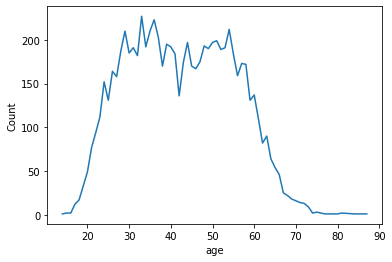

In [5]:
# finding relationship between age and accidental drug-caused death
ages = data.groupby('age')['id'].count().reset_index()
age_plt = sns.lineplot(data=ages, x='age', y='id')
age_plt.set(ylabel='Count')
age_plt

<AxesSubplot:xlabel='age', ylabel='Count'>

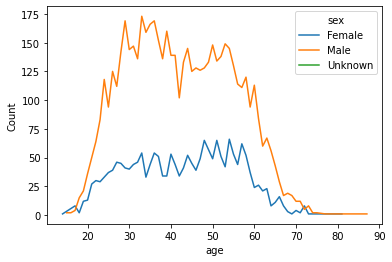

In [6]:
# find relationship between age and accidental drug-caused death by gender
age_gender = data.groupby(['sex', 'age'])['id'].count().reset_index()
age_gender = age_gender[age_gender.sex != 'unknown']
age_gender_plt = sns.lineplot(data=age_gender, x='age', y='id', hue='sex')
age_gender_plt.set(ylabel='Count')
age_gender_plt

Text(0, 0.5, 'Count (Death)')

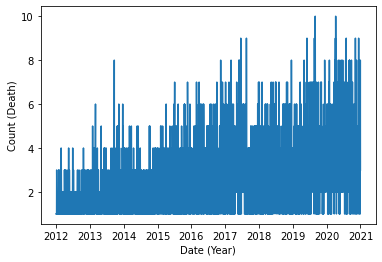

In [7]:
# plotting the number of cases by time
# note that distplot does not work well with datetime formats, hence a lineplot is used
year = data.copy()
year['date'] = pd.to_datetime(year['date'], format='%Y')
dates = year.groupby('date')['id'].count().reset_index()
dates.head(10)
date_case_plt = sns.lineplot(x='date', y='id', data=dates)
date_case_plt.set_xlabel("Date (Year)")
date_case_plt.set_ylabel("Count (Death)")

In [10]:
# count missing values and the proportion of each column that is missing
nan_dict = {}
cols = data.columns
for col in cols:
    nan_dict[col] = [data[col].isna().sum(), round(data[col].isna().sum()/len(data[col]), 3)]
nan_dict

{'id': [0, 0.0],
 'date': [2, 0.0],
 'date type': [2, 0.0],
 'age': [3, 0.0],
 'sex': [11, 0.001],
 'race': [23, 0.003],
 'description of injury': [789, 0.103],
 'injury place': [79, 0.01],
 'cause of death': [0, 0.0],
 'heroin': [35, 0.005],
 'cocaine': [35, 0.005],
 'fentanyl': [35, 0.005],
 'fentanyl analogue': [35, 0.005],
 'oxycodone': [35, 0.005],
 'oxymorphone': [35, 0.005],
 'ethanol': [35, 0.005],
 'hydrocodone': [35, 0.005],
 'benzodiazepine': [35, 0.005],
 'methadone': [35, 0.005],
 'amphet': [35, 0.005],
 'tramad': [35, 0.005],
 'morphine (not heroin)': [35, 0.005],
 'hydromorphone': [35, 0.005],
 'xylazine': [35, 0.005],
 'other': [35, 0.005],
 'opiate nos': [35, 0.005],
 'any opioid': [35, 0.005]}

<AxesSubplot:xlabel='%', ylabel='col type'>

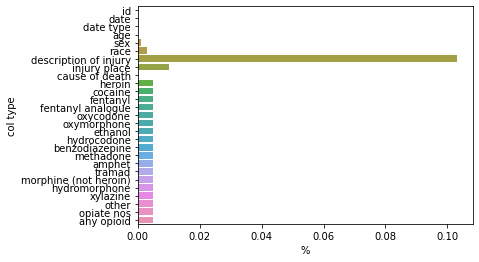

In [11]:
# plot missing values onto chart
missing_df = pd.DataFrame.from_dict(nan_dict, orient='index').reset_index()
missing_df.columns = ['col type', 'crude count', '%']
missing_plt = sns.barplot(data=missing_df, x='%', y='col type')
missing_plt

In [12]:
# select type of drug used and show stats
def show_drug_type_stats(drug):
    selected_drug = data[data[drug] == "Y"]
    total_count = len(selected_drug)
    if total_count == 0: return "There are no data for this drug."
    male_count = len(selected_drug[selected_drug["sex"] == 'Male'])
    female_count = len(selected_drug[selected_drug["sex"] == 'Female'])
    average_age = np.mean(selected_drug['age'])
    race_mode = mode(selected_drug['race'])

    print("There were", total_count, "incidences related to", drug)
    print("Of which, the number of males is", male_count)
    print("The number of females is", female_count)
    print('The average age is', average_age)
    print('The most seen race is', race_mode)

    # age distribution
    age = selected_drug.groupby('age')['id'].count().reset_index()
    plt.figure()
    age_plt = sns.lineplot(data=age, x='age', y='id')
    age_plt.set(ylabel='Count')
    age_plt.set(title=drug)
    return age_plt

testing with benzodiazepine...
There were 1940 incidences related to benzodiazepine
Of which, the number of males is 1257
The number of females is 679
The average age is 43.43115007735946
The most seen race is White


<AxesSubplot:title={'center':'benzodiazepine'}, xlabel='age', ylabel='Count'>

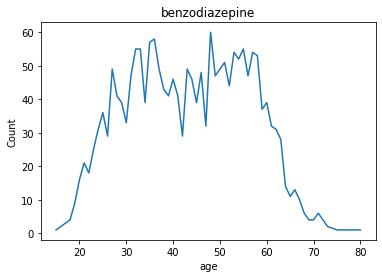

In [13]:
# test function
print("testing with benzodiazepine...")
show_drug_type_stats('benzodiazepine')


 testing with heroin...
There were 3178 incidences related to heroin
Of which, the number of males is 2488
The number of females is 688
The average age is 41.32662051604783
The most seen race is White

 testing with cocaine...
There were 2513 incidences related to cocaine
Of which, the number of males is 1883
The number of females is 627
The average age is 43.15764331210191
The most seen race is White

 testing with fentanyl...
There were 4366 incidences related to fentanyl
Of which, the number of males is 3420
The number of females is 936
The average age is 41.36640696608616
The most seen race is White

 testing with fentanyl analogue...
There were 593 incidences related to fentanyl analogue
Of which, the number of males is 457
The number of females is 134
The average age is 41.841483979763915
The most seen race is White

 testing with oxycodone...
There were 794 incidences related to oxycodone
Of which, the number of males is 531
The number of females is 262
The average age is 46.26

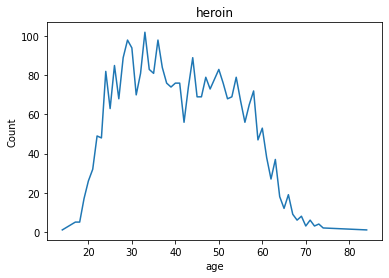

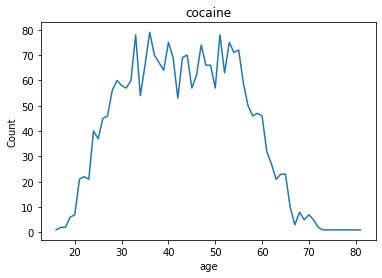

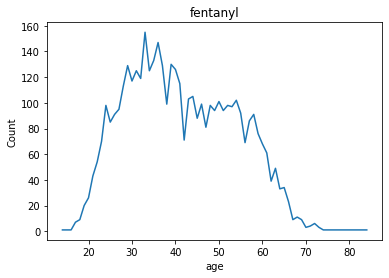

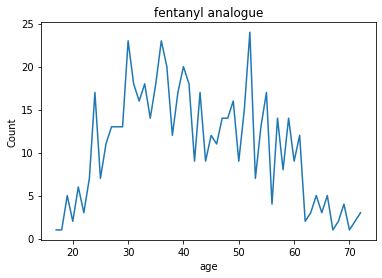

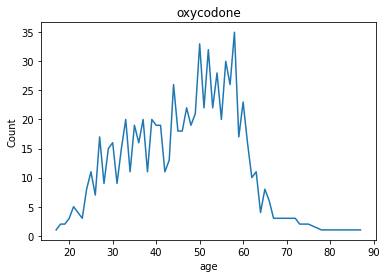

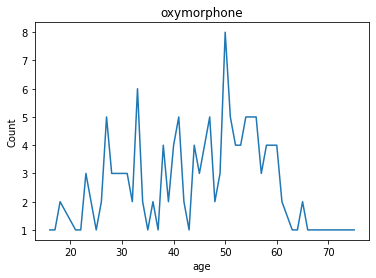

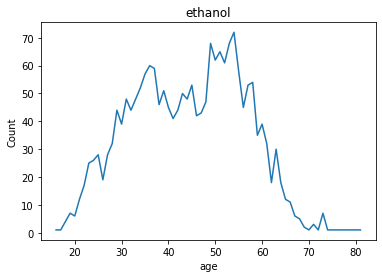

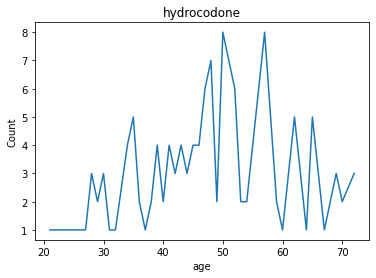

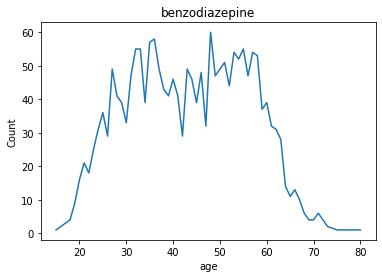

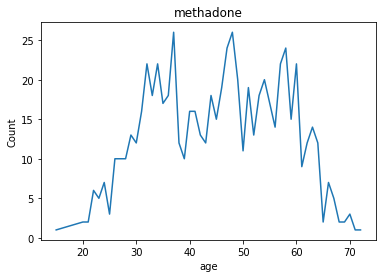

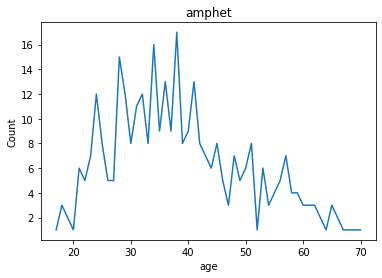

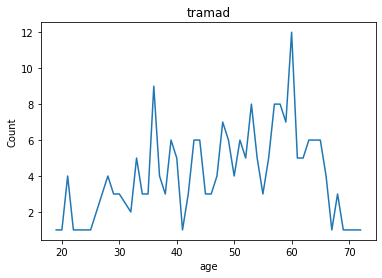

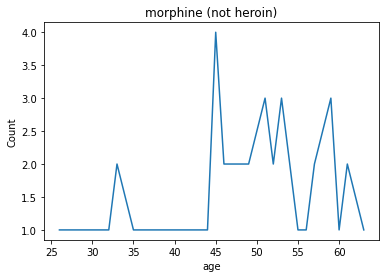

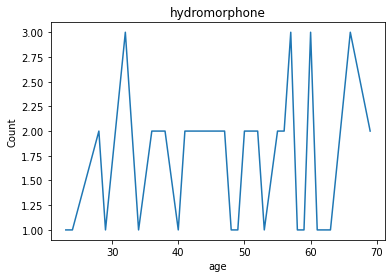

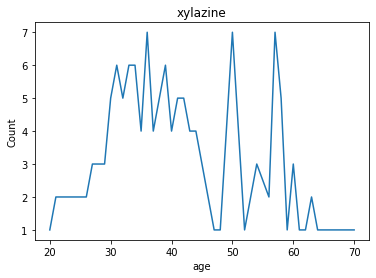

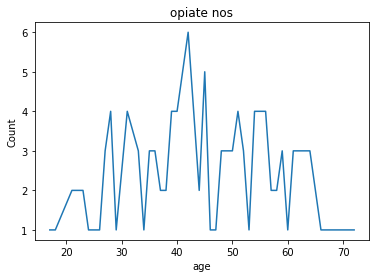

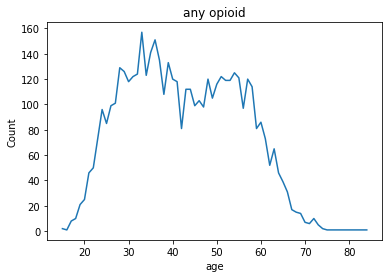

In [14]:
# generate graphs for static
for drug in ["heroin", "cocaine", "fentanyl", "fentanyl analogue", "oxycodone", "oxymorphone", "ethanol", "hydrocodone", "benzodiazepine", "methadone", "amphet", "tramad", "morphine (not heroin)", "hydromorphone", "xylazine", "other", "opiate nos",	"any opioid"]:
    print("\n testing with", drug+"...")
    show_drug_type_stats(drug)